# Dwave Simulation

https://docs.ocean.dwavesys.com/en/stable/docs_dnx/reference/algorithms/generated/dwave_networkx.maximum_independent_set.html#dwave_networkx.maximum_independent_set

https://cloud.dwavesys.com/learning/user/alicebarthe_40gmail_2ecom/notebooks/leap/demos/structural-imbalance/01-structural-imbalance-overview.ipynb

In [1]:
import dimod
import dwave_networkx as dnx

In [2]:
sampler = dimod.SimulatedAnnealingSampler()
G = dnx.chimera_graph(1, 1, 4)
indep_nodes = dnx.maximum_independent_set(G, sampler)

In [3]:
indep_nodes

[0, 1, 2, 3]

In [10]:
G.edges

EdgeView([(0, 4), (0, 5), (0, 6), (0, 7), (4, 1), (4, 2), (4, 3), (5, 1), (5, 2), (5, 3), (6, 1), (6, 2), (6, 3), (7, 1), (7, 2), (7, 3)])

In [12]:
for node in G.nodes:
    G.nodes[node]['color'] = 0 if node in indep_nodes else 1

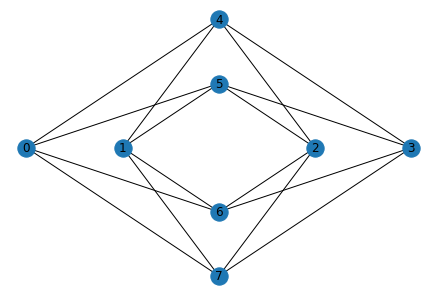

In [15]:
dnx.draw_chimera(G,with_labels=True)

In [14]:
from helpers.draw import draw

draw(G, with_labels=True);

ModuleNotFoundError: No module named 'helpers'

In [11]:
from dwave.system import DWaveSampler, EmbeddingComposite

sampler = EmbeddingComposite(DWaveSampler())

In [ ]:
import dwave_networkx as dnx

imbalance, bicoloring = dnx.structural_imbalance(G, sampler)

# Mark on the graph the returned frustrated edges and node set (color)  
for edge in G.edges:
    G.edges[edge]['frustrated'] = edge in imbalance
for node in G.nodes:
    G.nodes[node]['color'] = bicoloring[node]

print('Yellow set: \n\t' + '\n\t'.join(list(person for (person, color) in bicoloring.items() if (color == 0))))
print('Blue set: \n\t' + '\n\t'.join(list(person for (person, color) in bicoloring.items() if (color == 1))))
print('Frustrated relationships: \n\t' + '\n\t'.join(list(x + " & " + y for (x, y) in imbalance.keys())))